# Notes

- Fix $G_1$ at a low value
- Change de values of $G_0$, calculate the equilibrium for each value
- Don't use FOCs, just compute the 2nd stage equilibrium directly.
- Don't assume the restriction for the mininimum welfare of the low type is binding.

**Loading packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly
import pickle

**Loading definitions for the symbols, values, parameters, etc.**

In [ ]:
# This is loading packages as well
%run Numerical_Symbols_and_Equations_GridBothGs.ipynb

**Changing the externalities to zero**

In [ ]:
# Externalities: Will set them to zero initially
psiR = 0*np.ones(shape = (1,1,K)) #np.zeros(shape = (1,1,K))  # Externality R

psiL = 0*np.ones(shape = (1,1,K)) #np.zeros(shape = (1,1,K)) # Externality L

**Checking $G$ and constructing the grid:**

In [ ]:
G0_grid = np.linspace(0.1, 2.15, 15)
G1_grid = np.linspace(0.1, 2.15, 15)
#G0, G1 = np.meshgrid(G0_grid, G1_grid)

In [ ]:
varnames = ('G', 'r', 'tau', 'Nn', 'L', 
         'upsilon', 'upsilonL', 'lamb', 'w', 'A', 'chi', 'h', 'v', 'N', 
         'welf_high', 'welf_low'
        )

In [ ]:
results = {var_name: {G_1:{G_0: None for G_0 in G0_grid} for G_1 in G1_grid} for var_name in varnames}

# Loops making $G_0$ vary

In [ ]:
# Fix G_1 at 0.3
#G[1,0,0] = 0.1

See if making iterations with both G equal will lead to symmetric equilibrium

In [ ]:
count = 1
for G_0 in G0_grid:
    for G_1 in G1_grid:
        G[0,0,0]  = G_0 # Changing the value of G_0
        G[1,0,0] = G_1 # Changing the value of G_1
        print(f'Iteration {count}: G_1 = {G_1}, G_0 = {G_0}')
        count+=1

        %run Numerical_Iterations_GridBothGs.ipynb # Runs the iterations

        # Saving the results
        arrays = (G, r, tau, Nn, L, 
             upsilon, upsilonL, lamb, w, A, chi, h, v, N, 
             welf_fun(k=1), welf_fun(k=0)
            )
        for names, array_copies in zip(varnames, (np.copy(array) if type(array) == np.ndarray 
                                                                  else array
                                                  for array in arrays)
                                      ):
            results[names][G_0][G_1] = array_copies


# Saving and loading results

In [ ]:
results

In [1]:
# Save
#filename_high_ext = '3d_results_externalities_high.pickle'
#filename_low_ext = '3d_results_externalities_low.pickle'
filename_no_ext = '3d_results_no_externalities.pickle'
config = 'No_Ext'
folder = 'Graphs_'+config
# with open(filename_no_ext, 'wb') as handle:
#     pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
#Load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import plotly.graph_objects as go

with open(filename_no_ext, 'rb') as handle:
    results = pickle.load(handle)

# Plots and analysis

Check if these variables are evolving as we should expect

In [3]:
G0_grid = np.linspace(0.1, 2.15, 15)
G1_grid = np.linspace(0.1, 2.15, 15)

In [4]:
X, Y = np.meshgrid(G0_grid, G1_grid)

In [5]:
results

{'G': {0.1: {0.1: array([[[0.1]],
   
          [[0.1]]]),
   0.2464285714285714: array([[[0.1       ]],
   
          [[0.24642857]]]),
   0.3928571428571428: array([[[0.1       ]],
   
          [[0.39285714]]]),
   0.5392857142857143: array([[[0.1       ]],
   
          [[0.53928571]]]),
   0.6857142857142856: array([[[0.1       ]],
   
          [[0.68571429]]]),
   0.832142857142857: array([[[0.1       ]],
   
          [[0.83214286]]]),
   0.9785714285714284: array([[[0.1       ]],
   
          [[0.97857143]]]),
   1.125: array([[[0.1  ]],
   
          [[1.125]]]),
   1.2714285714285714: array([[[0.1       ]],
   
          [[1.27142857]]]),
   1.4178571428571427: array([[[0.1       ]],
   
          [[1.41785714]]]),
   1.564285714285714: array([[[0.1       ]],
   
          [[1.56428571]]]),
   1.7107142857142856: array([[[0.1       ]],
   
          [[1.71071429]]]),
   1.857142857142857: array([[[0.1       ]],
   
          [[1.85714286]]]),
   2.003571428571428: array([[[

# Welfare

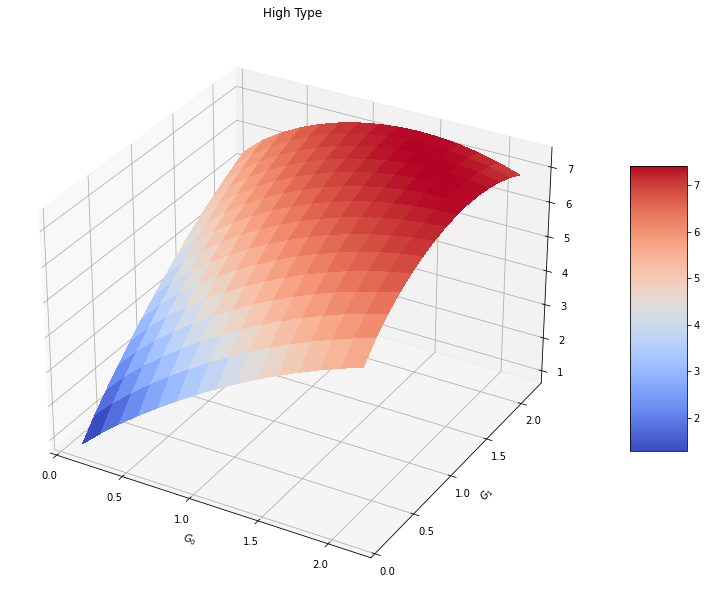

In [44]:
# Plot the surface.
Z = np.array([[results['welf_high'][g0][g1] for g1 in G1_grid] for g0 in G0_grid ])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(18.5, 10.5)
plt.title('High Type')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$G_0$')
ax.set_ylabel('$G_1$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig(f'{folder}/welfare_high_3d.png')
plt.show()

In [45]:
fig = go.Figure(data=[go.Surface(z=Z, y=G0_grid, x=G1_grid)])
fig.update_layout(title='Welfare (High) | Externalities', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_1',
                    yaxis_title='G_0'
                              )
                 )
fig.show()
fig.write_html(f"{folder}/welfare_high_{config}.html")

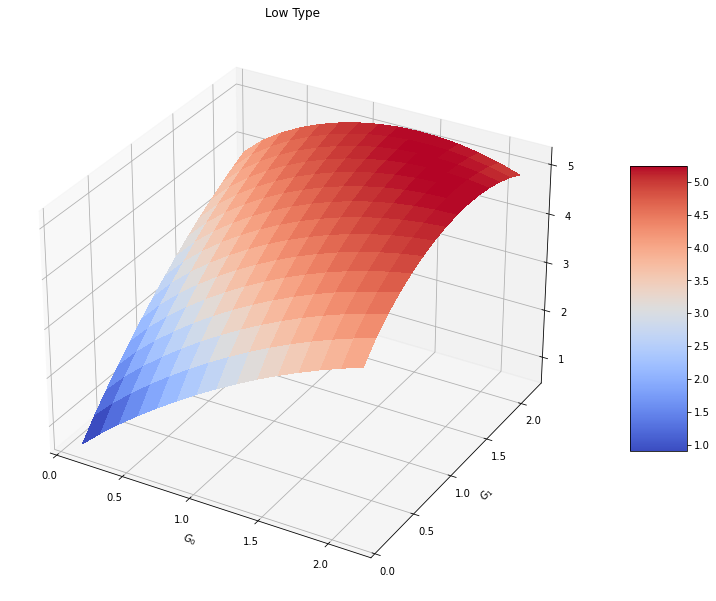

In [8]:
# Plot the surface.
Z = np.array([[results['welf_low'][g0][g1] for g1 in G1_grid] for g0 in G0_grid ])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(18.5, 10.5)
plt.title('Low Type')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$G_0$')
ax.set_ylabel('$G_1$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig(f'{folder}//welfare_low_3d.png')
plt.show()

In [9]:
results['welf_low']

{0.1: {0.1: 0.5405090952837682,
  0.2464285714285714: 0.8985458797639173,
  0.3928571428571428: 1.2233934775638444,
  0.5392857142857143: 1.527037710387609,
  0.6857142857142856: 1.813267661102593,
  0.832142857142857: 2.0837735680331875,
  0.9785714285714284: 2.339420648695965,
  1.125: 2.5806717372381485,
  1.2714285714285714: 2.807763832618076,
  1.4178571428571427: 3.020793139774837,
  1.564285714285714: 3.2197601178356874,
  1.7107142857142856: 3.4045948982355196,
  1.857142857142857: 3.5751721530966636,
  2.003571428571428: 3.731319838300382,
  2.15: 3.872824112509813},
 0.2464285714285714: {0.1: 0.8985460338279075,
  0.2464285714285714: 1.2854084148542042,
  0.3928571428571428: 1.6257995622019372,
  0.5392857142857143: 1.9381293562721589,
  0.6857142857142856: 2.2285667930336603,
  0.832142857142857: 2.5000004728797327,
  0.9785714285714284: 2.753996943875154,
  1.125: 2.9914682133717787,
  1.2714285714285714: 3.2129563679852398,
  1.4178571428571427: 3.4187730991221743,
  1.564

In [10]:
fig = go.Figure(data=[go.Surface(z=Z, y=G0_grid, x=G1_grid)])
fig.update_layout(title='Welfare (Low) | Externalities', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_1',
                    yaxis_title='G_0'
                              )
                 )
fig.show()
fig.write_html(f"{folder}/welfare_low_{config}.html")
plt.show()

# $r$

No handles with labels found to put in legend.


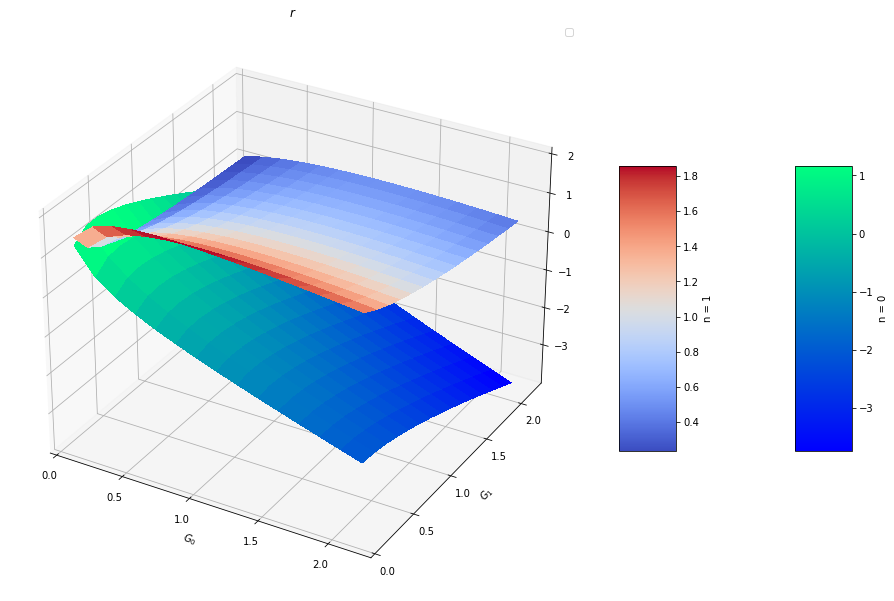

In [11]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(18.5, 10.5)
plt.title('$r$')
for i_n in range(2):
        Z = np.array([[results['r'][g0][g1][i_n,0,0] for g1 in G1_grid] for g0 in G0_grid ])
        if i_n==0:
            cmap = cm.winter
        else:
            cmap = cm.coolwarm
        surf = ax.plot_surface(X, Y, Z, cmap=cmap,
                       linewidth=0, antialiased=False)
        ax.set_xlabel('$G_0$')
        ax.set_ylabel('$G_1$')
        fig.colorbar(surf, shrink=0.5, aspect=5, label = f'n = {i_n}')
ax.legend()
plt.savefig(f'{folder}/r_3d.png')
plt.show()

In [12]:
results['r']

{0.1: {0.1: array([[[1.20710659]],
  
         [[1.40710697]]]),
  0.2464285714285714: array([[[0.57739707]],
  
         [[1.81719288]]]),
  0.3928571428571428: array([[[0.21090776]],
  
         [[1.96404738]]]),
  0.5392857142857143: array([[[-0.06770006]],
  
         [[ 2.02301614]]]),
  0.6857142857142856: array([[[-0.30435439]],
  
         [[ 2.04002921]]]),
  0.832142857142857: array([[[-0.51721098]],
  
         [[ 2.0332432 ]]]),
  0.9785714285714284: array([[[-0.71507588]],
  
         [[ 2.01146465]]]),
  1.125: array([[[-0.90279878]],
  
         [[ 1.97954356]]]),
  1.2714285714285714: array([[[-1.08329532]],
  
         [[ 1.94039579]]]),
  1.4178571428571427: array([[[-1.25843521]],
  
         [[ 1.89589119]]]),
  1.564285714285714: array([[[-1.42947857]],
  
         [[ 1.84728995]]]),
  1.7107142857142856: array([[[-1.59730883]],
  
         [[ 1.79547552]]]),
  1.857142857142857: array([[[-1.76256573]],
  
         [[ 1.74108771]]]),
  2.003571428571428: array([[[-

In [13]:
# Plot the surface.
Z = [None, None]
Z[0] = np.array([[results['r'][g0][g1][0,0,0] for g1 in G1_grid] for g0 in G0_grid ])
Z[1] = np.array([[results['r'][g0][g1][1,0,0] for g1 in G1_grid] for g0 in G0_grid ])
fig = go.Figure(data=[go.Surface(z=Z[0], y=G0_grid, x=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='r', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/r_{config}.html")

# $\tau$

No handles with labels found to put in legend.


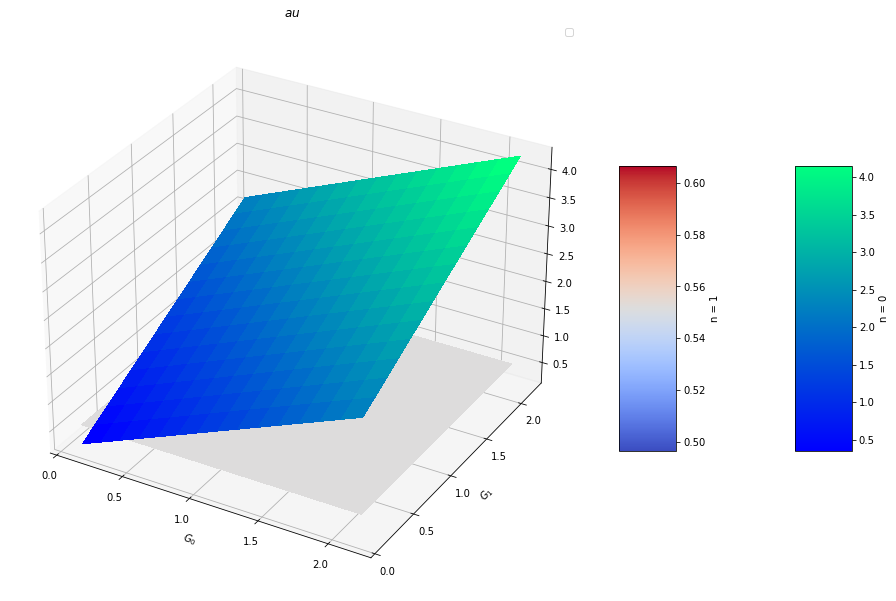

In [14]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(18.5, 10.5)
plt.title('$\tau$')
for i_n in range(2):
        Z = np.array([[results['tau'][g0][g1][i_n,0,0] for g1 in G1_grid] for g0 in G0_grid ])
        if i_n==0:
            cmap = cm.winter
        else:
            cmap = cm.coolwarm
        surf = ax.plot_surface(X, Y, Z, cmap=cmap,
                       linewidth=0, antialiased=False)
        ax.set_xlabel('$G_0$')
        ax.set_ylabel('$G_1$')
        fig.colorbar(surf, shrink=0.5, aspect=5, label = f'n = {i_n}')
ax.legend()
plt.savefig(f'{folder}/tau_3d.png')
plt.show()

In [15]:
results['tau']

{0.1: {0.1: array([[[0.2       ]],
  
         [[0.55147033]]]),
  0.2464285714285714: array([[[0.34642857]],
  
         [[0.55147033]]]),
  0.3928571428571428: array([[[0.49285714]],
  
         [[0.55147033]]]),
  0.5392857142857143: array([[[0.63928571]],
  
         [[0.55147033]]]),
  0.6857142857142856: array([[[0.78571429]],
  
         [[0.55147033]]]),
  0.832142857142857: array([[[0.93214286]],
  
         [[0.55147033]]]),
  0.9785714285714284: array([[[1.07857143]],
  
         [[0.55147033]]]),
  1.125: array([[[1.225     ]],
  
         [[0.55147033]]]),
  1.2714285714285714: array([[[1.37142857]],
  
         [[0.55147033]]]),
  1.4178571428571427: array([[[1.51785714]],
  
         [[0.55147033]]]),
  1.564285714285714: array([[[1.66428571]],
  
         [[0.55147033]]]),
  1.7107142857142856: array([[[1.81071429]],
  
         [[0.55147033]]]),
  1.857142857142857: array([[[1.95714286]],
  
         [[0.55147033]]]),
  2.003571428571428: array([[[2.10357143]],
  
    

In [16]:
# Plot the surface.
Z = [None, None]
Z[0] = np.array([[results['tau'][g0][g1][0,0,0] for g1 in G1_grid] for g0 in G0_grid ])
Z[1] = np.array([[results['tau'][g0][g1][1,0,0] for g1 in G1_grid] for g0 in G0_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], y=G0_grid, x=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='tau', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/tau_{config}.html")

## $\tau + r$

In [17]:
results['tau'][2.15][2.15]+results['r'][2.15][2.15]

array([[[0.38209178]],

       [[0.93359211]]])

In [18]:
# Plot the surface.
Z = [None, None]
Z[0] = np.array([[results['tau'][g0][g1][0,0,0]+results['r'][g0][g1][0,0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['tau'][g0][g1][1,0,0]+results['r'][g0][g1][1,0,0] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='tau + r', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/tau_plus_r_{config}.html")

# $N_n$

In [19]:
results['Nn']

{0.1: {0.1: array([[[1.00008271]],
  
         [[1.00008231]]]),
  0.2464285714285714: array([[[0.67418342]],
  
         [[1.32581727]]]),
  0.3928571428571428: array([[[0.52770465]],
  
         [[1.47229536]]]),
  0.5392857142857143: array([[[0.44070279]],
  
         [[1.55929721]]]),
  0.6857142857142856: array([[[0.38192719]],
  
         [[1.61807281]]]),
  0.832142857142857: array([[[0.33907778]],
  
         [[1.66092222]]]),
  0.9785714285714284: array([[[0.30621146]],
  
         [[1.69378854]]]),
  1.125: array([[[0.28006685]],
  
         [[1.71993315]]]),
  1.2714285714285714: array([[[0.25868987]],
  
         [[1.74131013]]]),
  1.4178571428571427: array([[[0.24083133]],
  
         [[1.75916867]]]),
  1.564285714285714: array([[[0.22565197]],
  
         [[1.77434803]]]),
  1.7107142857142856: array([[[0.212565]],
  
         [[1.787435]]]),
  1.857142857142857: array([[[0.20114689]],
  
         [[1.79885311]]]),
  2.003571428571428: array([[[0.19108363]],
  
        

In [20]:
Z[0][0,0]

1.4071065888097745

In [21]:
# Plot the surface.
Z = [None, None]
Z[0] = np.array([[results['Nn'][g0][g1][0,0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['Nn'][g0][g1][1,0,0] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='Nn', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/Nn_{config}.html")

# $L_n^k$

In [22]:
results['L']

{0.1: {0.1: array([[[0.50004977, 0.50005003]],
  
         [[0.5000999 , 0.50009994]]]),
  0.2464285714285714: array([[[0.44569739, 0.44569739]],
  
         [[0.55430324, 0.55430324]]]),
  0.3928571428571428: array([[[0.42128411, 0.42128411]],
  
         [[0.5787159 , 0.5787159 ]]]),
  0.5392857142857143: array([[[0.4067838, 0.4067838]],
  
         [[0.5932162, 0.5932162]]]),
  0.6857142857142856: array([[[0.39698786, 0.39698786]],
  
         [[0.60301214, 0.60301214]]]),
  0.832142857142857: array([[[0.3898463, 0.3898463]],
  
         [[0.6101537, 0.6101537]]]),
  0.9785714285714284: array([[[0.38436858, 0.38436858]],
  
         [[0.61563142, 0.61563142]]]),
  1.125: array([[[0.38001114, 0.38001114]],
  
         [[0.61998886, 0.61998886]]]),
  1.2714285714285714: array([[[0.37644831, 0.37644831]],
  
         [[0.62355169, 0.62355169]]]),
  1.4178571428571427: array([[[0.37347189, 0.37347189]],
  
         [[0.62652811, 0.62652811]]]),
  1.564285714285714: array([[[0.370942, 0.

In [23]:
results['L'][2.15][0.1][1,0,0]

0.36368947376519833

In [24]:
Z = [None, None]
Z[0] = np.array([[results['L'][g0][g1][0,0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['L'][g0][g1][1,0,0] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='Lnk', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/Lnk_{config}.html")

# $w_n^k$

In [25]:
Z = [None, None]
Z[0] = np.array([[results['w'][g0][g1][0,0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['w'][g0][g1][0,0,1] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'k=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'k=1', colorscale = 'Reds')
            )
fig.update_layout(title='w', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/w_{config}.html")

# $\Upsilon_n^k$ and $\Upsilon_n^\mathcal{L}$

In [26]:
Z = [None, None]
Z[0] = np.array([[results['upsilon'][g0][g1][0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['upsilon'][g0][g1][1,0] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='upsilon', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/ups_{config}.html")

In [27]:
Z = [None, None]
Z[0] = np.array([[results['upsilonL'][g0][g1][0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['upsilonL'][g0][g1][1,0] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='upsilonL', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/upsL_{config}.html")

# $\lambda$

No handles with labels found to put in legend.


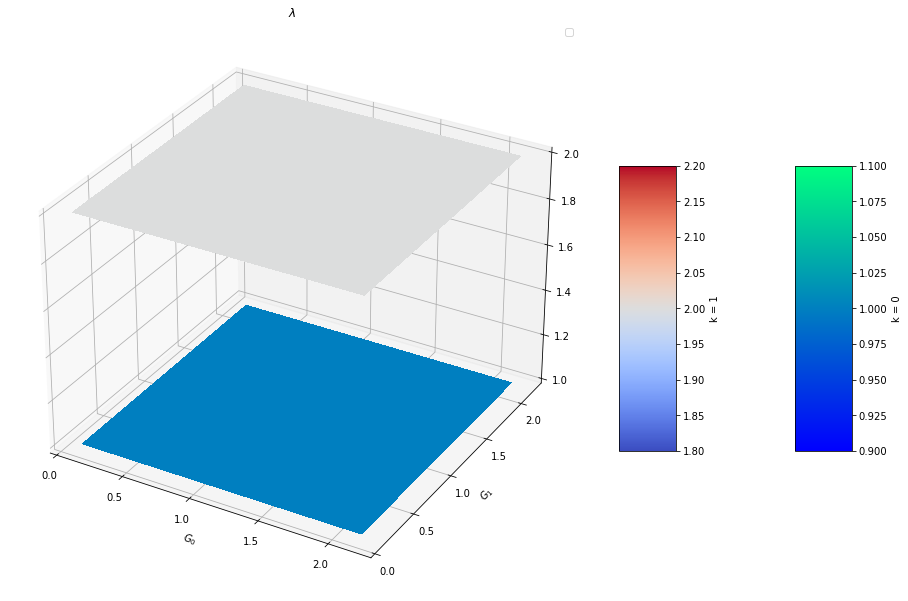

In [28]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(18.5, 10.5)
plt.title('$\\lambda$')
for i_k in range(2):
        Z = np.array([[results['lamb'][g0][g1][0,0,i_k] for g1 in G1_grid] for g0 in G0_grid ])
        if i_k==0:
            cmap = cm.winter
        else:
            cmap = cm.coolwarm
        surf = ax.plot_surface(X, Y, Z, cmap=cmap,
                       linewidth=0, antialiased=False)
        ax.set_xlabel('$G_0$')
        ax.set_ylabel('$G_1$')
        fig.colorbar(surf, shrink=0.5, aspect=5, label = f'k = {i_k}')
ax.legend()
plt.savefig(f'{folder}/lambdas_3d.png')
plt.show()

In [29]:
Z = [None, None]
Z[0] = np.array([[results['lamb'][g0][g1][0,0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['lamb'][g0][g1][0,0,1] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'k=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'k=1', colorscale = 'Reds')
            )
fig.update_layout(title='lambda', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/lambda_{config}.html")

# $A_n$

In [30]:
Z = [None, None]
Z[0] = np.array([[results['A'][g0][g1][0,0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['A'][g0][g1][1,0,0] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'n=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'n=1', colorscale = 'Reds')
            )
fig.update_layout(title='A', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/A_{config}.html")

# $\chi^k$

In [31]:
Z = [None, None]
Z[0] = np.array([[results['chi'][g0][g1][0,0,0] for g0 in G0_grid] for g1 in G1_grid ])
Z[1] = np.array([[results['chi'][g0][g1][0,0,1] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0], x=G0_grid, y=G1_grid, name = 'k=0',colorscale = 'Blues')])
fig.add_trace(go.Surface(z=Z[1], y=G0_grid, x=G1_grid,name = 'k=1', colorscale = 'Reds')
            )
fig.update_layout(title='chi', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/chi_{config}.html")

# $h_{nn'}^k$

In [32]:
G0_grid

array([0.1       , 0.24642857, 0.39285714, 0.53928571, 0.68571429,
       0.83214286, 0.97857143, 1.125     , 1.27142857, 1.41785714,
       1.56428571, 1.71071429, 1.85714286, 2.00357143, 2.15      ])

In [33]:
G1_grid

array([0.1       , 0.24642857, 0.39285714, 0.53928571, 0.68571429,
       0.83214286, 0.97857143, 1.125     , 1.27142857, 1.41785714,
       1.56428571, 1.71071429, 1.85714286, 2.00357143, 2.15      ])

In [34]:
results['h'][0.9785714285714284][2.15]

array([[[1.16177361, 1.642996  ],
        [1.16177361, 1.642996  ]],

       [[0.64372256, 0.91036118],
        [0.64372256, 0.91036118]]])

In [35]:
results['h'][0.1][2.15]

array([[[4.55089957, 6.4359439 ],
        [4.55089957, 6.4359439 ]],

       [[0.45568592, 0.64443721],
        [0.45568592, 0.64443721]]])

In [36]:
results['h'][0.1][2.15][0,0,0]

4.550899573877971

In [37]:
results['h'][0.1][2.15][0,1,0]

4.550899573877971

In [38]:
results['h'][0.1][2.15][0,0,1]

6.435943898376165

In [39]:
import plotly.express as px

In [40]:
Z = [[None, None], [None, None]]
colors = [['Reds', 'Blues'], ['Purples', 'algae']]
for i_n in range(2):
    for i_k in range(2):
        Z[i_n][i_k] = np.array([[results['h'][g0][g1][i_n,0,i_k] for g0 in G0_grid] for g1 in G1_grid ])

fig = go.Figure(data=[go.Surface(z=Z[0][0], x=G0_grid, y=G1_grid, name = 'n=0, k=0',colorscale = colors[0][0])])
for i_n in range(2):
    for i_k in range(2):
        if  (i_n != 0) or (i_k!=0):
            fig.add_trace(go.Surface(z=Z[i_n][i_k], y=G0_grid, x=G1_grid,
                                     name = f'n={i_n}, k={i_k}', colorscale = colors[i_n][i_k])
            )
fig.update_layout(title='h', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/h_{config}.html")

# $N_{nn'}^k$

In [41]:
Z = [[None, None], [None, None]]
colors = [['Reds', 'Blues'], ['Purples', 'algae']]
for i_n in range(2):
    for i_k in range(2):
        Z[i_n][i_k] = np.array([[results['N'][g0][g1][i_n,0,i_k]+ results['N'][g0][g1][i_n,1,i_k] 
                                 for g0 in G0_grid] 
                                for g1 in G1_grid ]
                              )

fig = go.Figure(data=[go.Surface(z=Z[0][0], x=G0_grid, y=G1_grid, name = 'n=0, k=0',colorscale = colors[0][0])])
for i_n in range(2):
    for i_k in range(2):
        if  (i_n != 0) or (i_k!=0):
            fig.add_trace(go.Surface(z=Z[i_n][i_k], y=G0_grid, x=G1_grid,
                                     name = f'n={i_n}, k={i_k}', colorscale = colors[i_n][i_k])
            )
fig.update_layout(title='N (aggregated by origin-type)', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/Nagg_{config}.html")

# $v_{nn'}^k$

In [42]:
from plotly.subplots import make_subplots

In [43]:
Z = {i_n: {i_nn: {i_k: np.array([[results['v'][g0][g1][i_n,i_nn,i_k]
                                 for g0 in G0_grid] 
                                for g1 in G1_grid ]
                              )
                  for i_k in range(2)} 
           for i_nn in range(2)} 
     for i_n in range(2)
    }
colors = [['Reds', 'Blues'], ['Purples', 'algae']]
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]],
    subplot_titles= ['k = 0', 'k = 1']
           )
for i_k in range(2):
    for i_n in range(2):
        for i_nn in range(2):
            fig.add_trace(go.Surface(z=Z[i_n][i_nn][i_k], y=G0_grid, x=G1_grid,
                                     name = f"n={i_n}, n'={i_nn}", colorscale = colors[i_n][i_nn]), 
                          row = 1, col = i_k+1
            )

fig.update_layout(title='v', autosize=False,
                  width=750, height=750,
                  margin=dict(l=150, r=100, b=150, t=180))
fig.update_layout(scene = dict(xaxis_title='G_0',
                    yaxis_title='G_1'
                              )
                 )
fig.update_traces(showlegend=True, showscale=False)
fig.show()
fig.write_html(f"{folder}/v_{config}.html")